# Parabolic Attractor Visualization

This notebook visualizes trajectories of the parabolic attractor defined in `data.parabolic_spec`, and compares them with the invariant parabola x2 = x1^2.

- System: dot(x1) = mu * x1, dot(x2) = lambda * (x2 - x1^2)
- Parameters: mu = -0.1, lambda = -1.0
- Integrator: RK4 (from `data.rk4_step`)



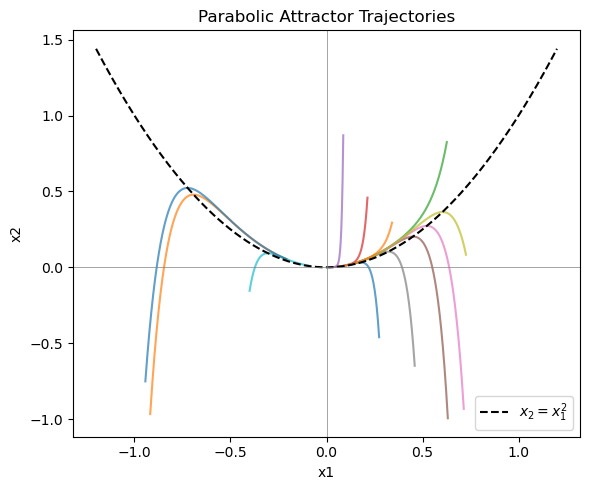

In [7]:
import os, sys
sys.path.insert(0, os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from data import parabolic_spec, rk4_step

spec = parabolic_spec()

# Simulation settings
rng = np.random.default_rng(0)
num_trajs = 12
steps = 1500
dt = 0.01

# Sample initial conditions
inits = [spec.init_sampler(rng).astype(np.float32) for _ in range(num_trajs)]

# Simulate
trajectories = []
for idx in range(num_trajs):
    x = inits[idx].copy()
    traj = np.zeros((steps, 2), dtype=np.float32)
    for k in range(steps):
        traj[k] = x
        x = rk4_step(spec.dynamics, k * dt, x, dt)
    trajectories.append(traj)

# Plot trajectories in state space
xs = np.linspace(-1.2, 1.2, 400)
parabola = xs ** 2

plt.figure(figsize=(6, 5))
for traj in trajectories:
    plt.plot(traj[:, 0], traj[:, 1], alpha=0.7)

plt.plot(xs, parabola, 'k--', label=r"$x_2 = x_1^2$")
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Parabolic Attractor Trajectories")
plt.legend()
plt.tight_layout()
plt.show()


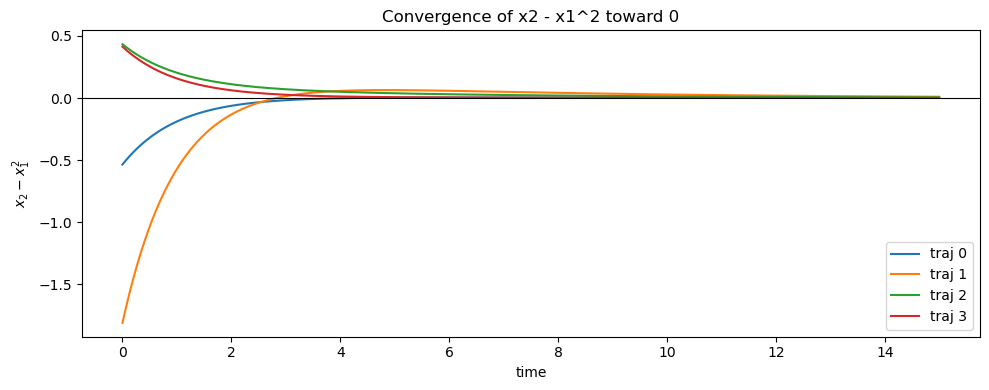

In [8]:
# Time series plots to show attraction toward the parabola
mu, lam = -0.1, -1.0

plt.figure(figsize=(10, 4))

# Choose a couple of trajectories
for j, idx in enumerate([0, 1, 2, 3]):
    traj = trajectories[idx]
    t = np.arange(steps) * dt
    x1 = traj[:, 0]
    x2 = traj[:, 1]
    plt.plot(t, x2 - x1**2, label=f"traj {idx}")

plt.axhline(0, color='k', lw=0.8)
plt.xlabel("time")
plt.ylabel(r"$x_2 - x_1^2$")
plt.title("Convergence of x2 - x1^2 toward 0")
plt.legend()
plt.tight_layout()
plt.show()
